In [1]:
import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import missingno

import matplotlib.pyplot as plt



df = pd.read_csv("store.csv")
df.head()

,BranchName,Week,DayWeek,Day,Month,Hour,Transaction_Type,Units,Amount
0,MyStore,1,3,2,1,9,Card,3,$54.00
1,MyStore,1,3,2,1,10,Cash,7,-$17.80
2,MyStore,1,3,2,1,10,Card,7,$41.99
3,MyStore,1,3,2,1,11,Card,20,$412.50
4,MyStore,1,3,2,1,12,Cash,1,-$18.00


First, let us clean the data set ready for the analysis. As you can see there is a dollar sign in front of every Amount. This will make it very difficult to perform mathematical operations. As part of the cleaning, we will remove the dollar sign.

In [2]:
df['Amount'] = df['Amount'].str.replace('$','').str.replace(',','')
df['Amount'] = pd.to_numeric(df['Amount'])
df.head()


C:\Users\Arshad\AppData\Local\Temp\ipykernel_2352\3236816959.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Amount'] = df['Amount'].str.replace('$','').str.replace(',','')


,BranchName,Week,DayWeek,Day,Month,Hour,Transaction_Type,Units,Amount
0,MyStore,1,3,2,1,9,Card,3,54.00
1,MyStore,1,3,2,1,10,Cash,7,-17.80
2,MyStore,1,3,2,1,10,Card,7,41.99
3,MyStore,1,3,2,1,11,Card,20,412.50
4,MyStore,1,3,2,1,12,Cash,1,-18.00


Another thing to note is in the Branch name variable, only one branch is seen through out the whole data frame. We therefore do not need this variable. If the data was from different stores we would have need for it. Below we drop the variable from the data frame

In [3]:
df.drop('BranchName',axis=1, inplace=True)
df.head(10)

,Week,DayWeek,Day,Month,Hour,Transaction_Type,Units,Amount
0,1,3,2,1,9,Card,3,54.00
1,1,3,2,1,10,Cash,7,-17.80
2,1,3,2,1,10,Card,7,41.99
3,1,3,2,1,11,Card,20,412.50
4,1,3,2,1,12,Cash,1,-18.00
5,1,3,2,1,12,Card,1,-5.00
6,1,3,2,1,12,Card,15,118.50
7,1,3,2,1,13,Cash,90,-94.92
8,1,3,2,1,13,Card,28,423.50
9,1,3,2,1,14,Cash,34,-95.39


Always check out for missing values, fortunately for this datset we have no missing values, This is not always the case and it is important to remember ways to handle missing data that we tackled in the previous task.

In [4]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:8]

Week                0
DayWeek             0
Day                 0
Month               0
Hour                0
Transaction_Type    0
Units               0
Amount              0
dtype: int64

From the histogram below, we can see that the range is -1000 to 1000. Well, it is unusual for the a purchase to total to a negative value. 

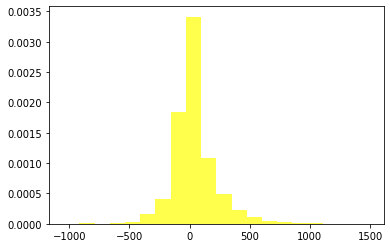

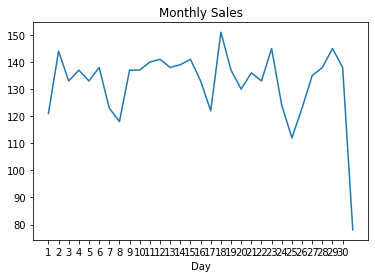

In [5]:

plt.hist(df['Amount'], 20, density =1,facecolor="yellow", alpha=0.7)
plt.show()

test = df['Amount'].groupby(df['Day']).size()
plot_month = test.plot(title = 'Monthly Sales', xticks = (range(1,31)))



In [6]:
positive = df.Amount[df['Amount'] > 0].count()
negative = df.Amount[df['Amount'] < 0].count()
print( 'positive = ', positive,'negative = ', negative)

positive =  1968 negative =  2131


As you can see, there are more negative values for amounts than positive. It now that you investigate from the company why they recored amounts in the negative. Can be transactions made on credit or any other cause that may inform the analysis.

In [7]:
sales_by_card = df.groupby('Transaction_Type').size()

print(sales_by_card)

Transaction_Type
Card    2811
Cash    1289
dtype: int64


###  Sales by Month


Text(0, 0.5, 'Total Sales')

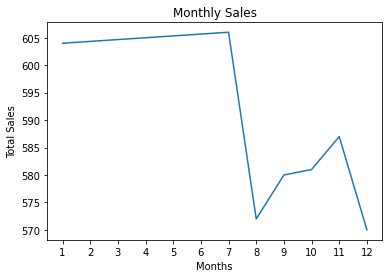

In [8]:
sales_by_month = df.groupby('Month').size()
plot_month = sales_by_month.plot(title = 'Monthly Sales', xticks = (1,2,3,4,5,6,7,8,9,10,11,12))
plot_month.set_xlabel('Months')
plot_month.set_ylabel('Total Sales')



This shows that from January to July the sales were almost steady but then something happened  and the sales declined rapidly. This can show that an investigation needs to be done on what changed around that time. This is how we explore our data and do investigations. Some assumptions would be that we changed hours the store is opened or we changed the vendors and suppliers.

### Sales by Day

Text(0, 0.5, 'Total Sales')

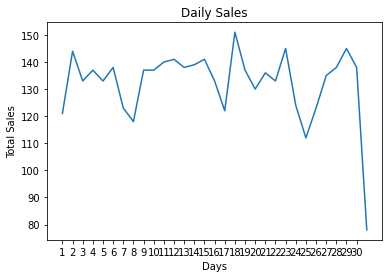

In [9]:
sales_by_month = df.groupby('Day').size()
plot_month = sales_by_month.plot(title = 'Daily Sales', xticks = (range(1,31)))
plot_month.set_xlabel('Days')
plot_month.set_ylabel('Total Sales')

Sales were fluctuating throughout the month but surprisingly there seems to be a significant drop at the end of the month. This is another point to investigate. Common sense dictates that the sales should increase at the end of the month but this happens in the contrary. Finding the reson behind it can be very interesting. Do you have any assumptions?


### Sale by Hour


Text(0, 0.5, 'Total Sales')

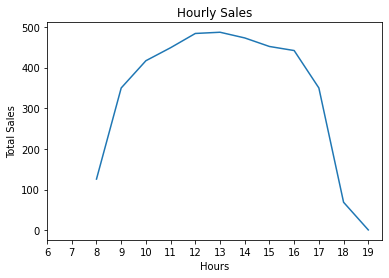

In [10]:
sales_by_month = df.groupby('Hour').size()
plot_month = sales_by_month.plot(title = 'Hourly Sales', xticks = (range(6,20)))
plot_month.set_xlabel('Hours')
plot_month.set_ylabel('Total Sales')

The sales seem to take a bell shape. The sales are highest from 11:00AM to 4:00PM. More customers visit in after noon than closing and opening hours. This can inform the administration on how to do the staffing and all other decisions.


Great, now that we have some back ground in storytelling in EDA now let us begin from the top.


### Exploratory Data Analysis on the Balance data set

We have handled the balance data set before but we only handled missing values. We will now try and do alot more.

According to our rubric, the first step is 

#### 1. What question are you trying to solve (or prove wrong)?

For this data set what we can build is a model that, according to the present variables, can predict the balance of future clients.


#### 2. What kind of data do you have?
Is your data numerical, categorical or something else? How do you deal with each kind?

As we can observe, we have 

Balance - [double][Continuous] The balance in the clients account

Income - [double][Continuous] The clients income.

Limit - [integer][Continuous] This is the credit card limit

Rating - [Double][Continuous] This is the Rating given to a client.

Cards - [Integer][Categorical] This is the number of cards the client 
has

Age -  [Integer][Categorical] This is the age of the client

Education - [Integer] [Categorical]This is the highest level of education attained by the client.

Gender - [String] [Categorical] Male or Female

Student - [String] [Categorical] Yes - the client is a student No - 
Client is not a student

Married -  [String] [Categorical] Yes - Client is married No - client is unmarried.

Ethnicity - [String] [Categorical] client can be Caucasion,Asian or African


In [11]:
balance = pd.read_csv('balance.txt', delim_whitespace=True)
balance.head(10)

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
0,12.240798,14.891,3606,283.0,2.0,NaN,11.0,Male,No,Yes,Caucasian
1,23.283334,NaN,6645,483.0,3.0,82.0,15.0,Female,NaN,Yes,Asian
2,22.530409,104.593,7075,NaN,4.0,71.0,11.0,Male,No,No,Asian
3,27.652811,148.924,9504,681.0,3.0,36.0,11.0,NaN,No,No,Asian
4,16.893978,55.882,4897,357.0,2.0,68.0,16.0,Male,No,Yes,Caucasian
5,22.486178,80.180,8047,569.0,4.0,77.0,10.0,Male,No,No,Caucasian
6,10.574516,20.996,3388,259.0,2.0,37.0,12.0,Female,No,No,African American
7,14.576204,71.408,7114,512.0,2.0,87.0,9.0,Male,No,No,Asian
8,7.938090,15.125,3300,266.0,5.0,66.0,13.0,Female,No,No,Caucasian
9,17.756965,71.061,6819,491.0,3.0,41.0,19.0,Female,Yes,Yes,African American


#### 3. What’s missing from the data and how do you deal with?

What missing values are there?
Where are the holes in our data?

These are rows which are missing a value or have NaN instead of something like the rest of the column.

<AxesSubplot:>

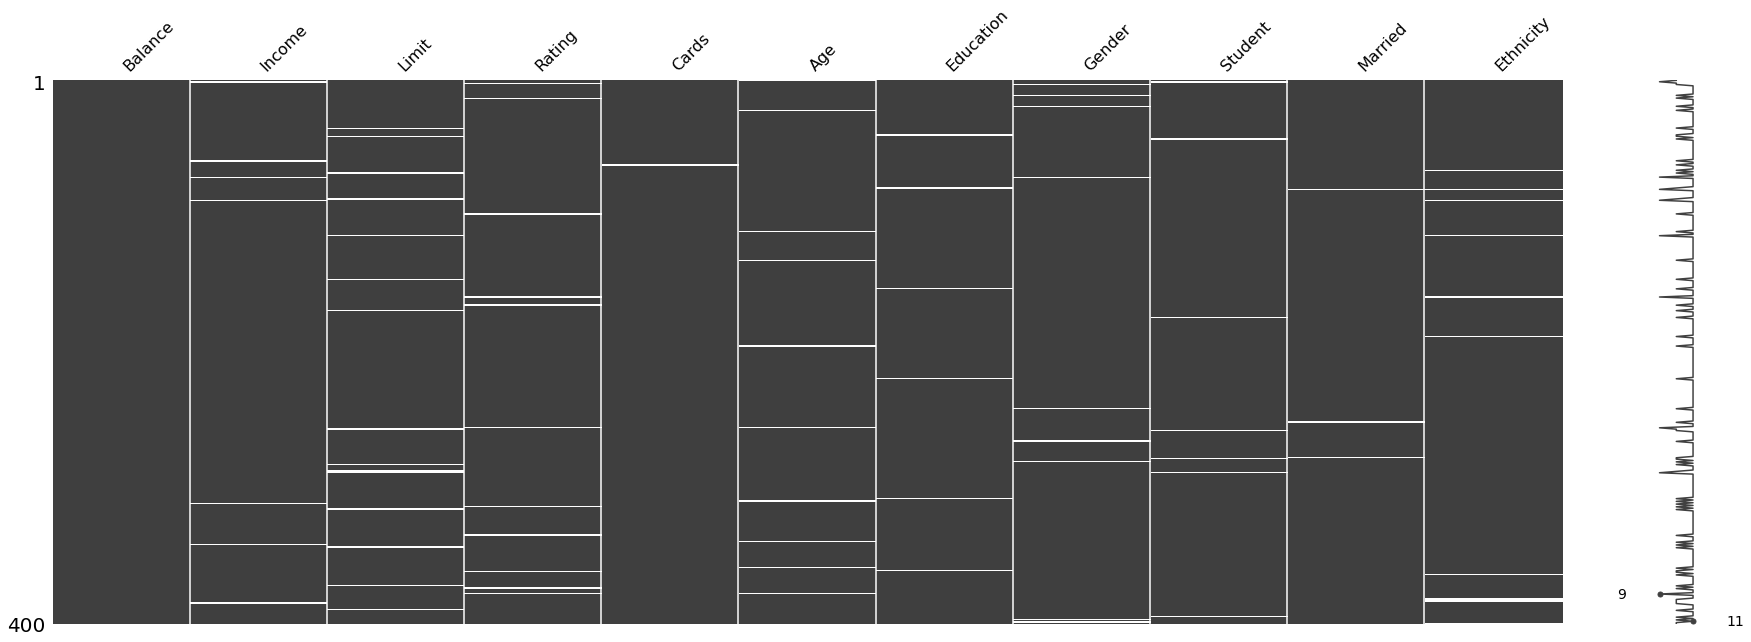

In [12]:
# Plot graphic of missing values
missingno.matrix(balance, figsize = (30,10))

We can now be able to visualise where the data is missing and be able to strategise. We handled missing data in this data set in the previous task so if you need any refreshers refer to the previous task. 

#####  4. Where are the outliers and why should pay attention to them?


#### To perform our data analysis, let's create two new dataframes
We'll create one for exploring discretised continuous variables (continuous variables which have been sorted into some kind of category) and another for exploring continuous variables.



In [13]:
df_bin = balance      # for discretised continuous variables
df_con = balance      # for continuous variables

#### Let's explore each of these features individually
We'll go through each column iteratively and see which ones to use in our first models. Some may need more preprocessing than others to get ready.

Female    203
 Male     188
Name: Gender, dtype: int64


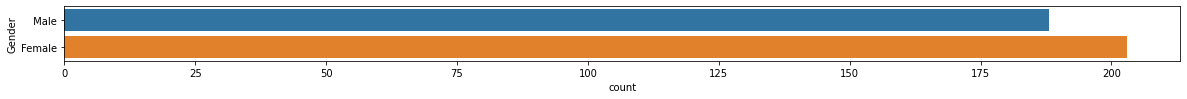

In [14]:
# How many clients are Male and Female
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Gender', data=df_bin);
print(df_bin.Gender.value_counts())

We can see that we have a little more females than male. This could be a coincidence or could be a real representation of the banks client list. Though the difference is not that significant.

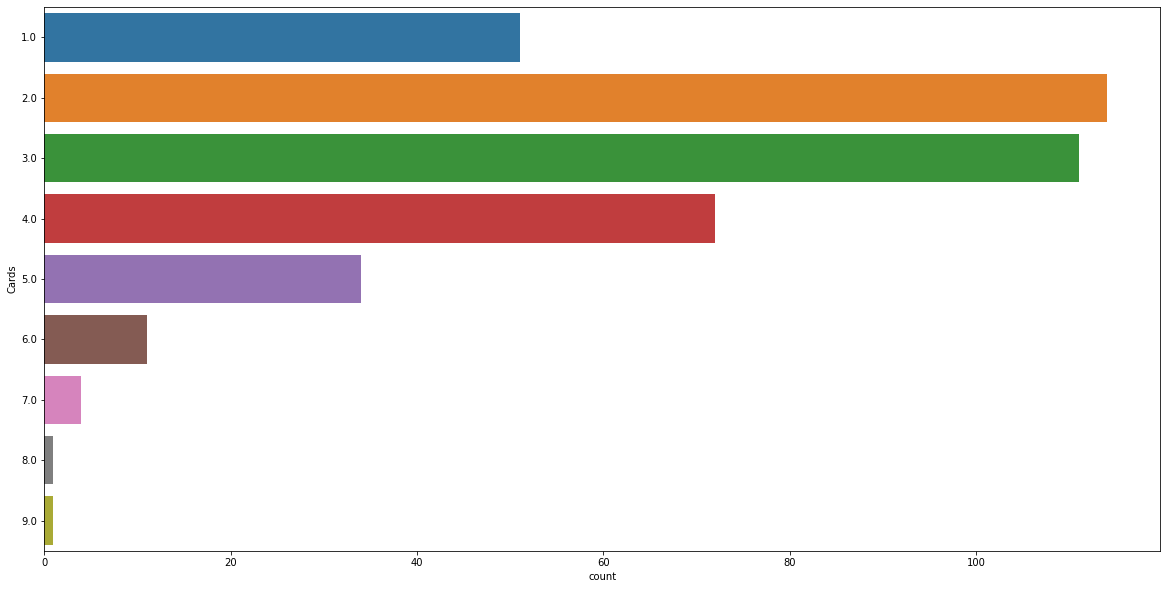

In [15]:
fig = plt.figure(figsize=(20,10))
sns.countplot(y=df_bin['Cards'], data=df_bin);

We can see with this feature, the values are numerical (1, 2 upto 8) but they are categories.

We can deduce that most clients have 2 to three 3 cards. An important thing to note is the average balance or income for every category.




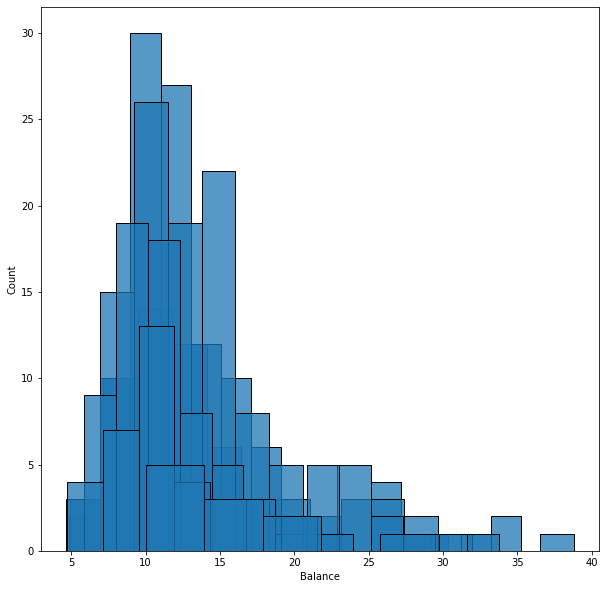

In [16]:
fig = plt.figure(figsize=(10, 10))
sns.histplot(df_bin.loc[df_bin['Cards'] == 1]['Balance'], kde_kws={'label': 'Cards = 1'});
sns.histplot(df_bin.loc[df_bin['Cards'] == 2]['Balance'], kde_kws={'label': 'Cards = 2'});
sns.histplot(df_bin.loc[df_bin['Cards'] == 3]['Balance'], kde_kws={'label': 'Cards = 2'});
sns.histplot(df_bin.loc[df_bin['Cards'] == 4]['Balance'], kde_kws={'label': 'Cards = 2'});
sns.histplot(df_bin.loc[df_bin['Cards'] == 5]['Balance'], kde_kws={'label': 'Cards = 2'});
sns.histplot(df_bin.loc[df_bin['Cards'] == 6]['Balance'], kde_kws={'label': 'Cards = 2'});




The plot above allows us to see that having different number of cards can be able to describe to us the balance that a client may have. 

In [17]:
## Fill in the same analysis for for the categorical variables 
# Student, Married and Ethnicity with corresponding plots and story lines








#### 5. How can you add, change or remove features to get more out of your data?


Now let us look at the age variable, I would like to say that it is a category variable but it has too many categories. Let up plot this to prove it.

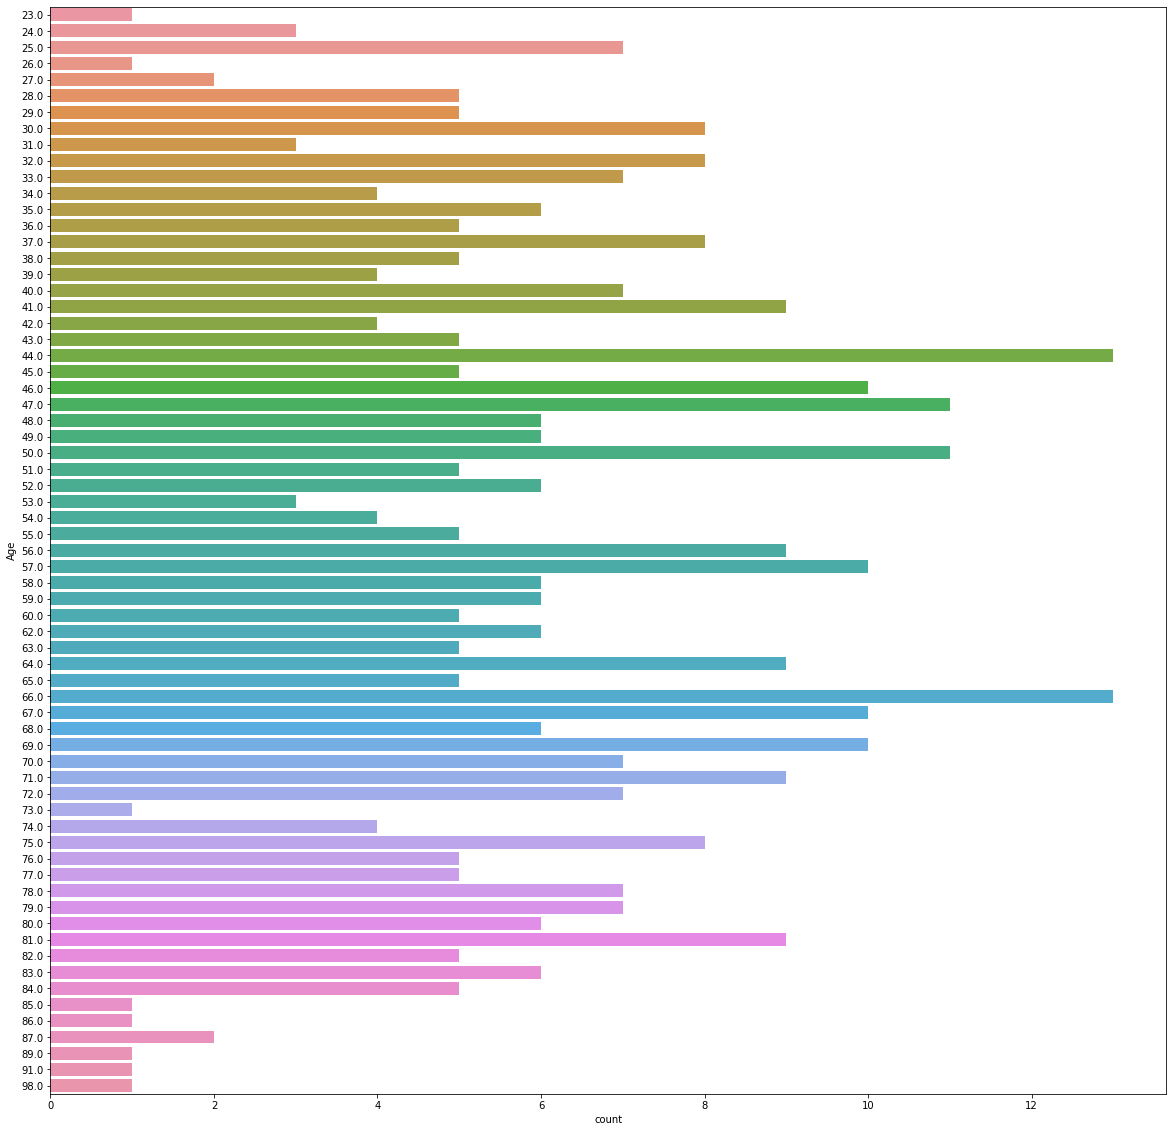

In [18]:
fig = plt.figure(figsize=(20,20))
sns.countplot(y=df_bin['Age'], data=df_bin);

These are so many categories to analyse. Some categorical variables such as this can be put into groups. Since we are dealing with age, let us try and put the clients into age groups. We can do this by putting them into age groups of 10 or 5 years. For this analysis let us do so for 10 years. So we will start with age group 20-29 then 30-39 and so on.

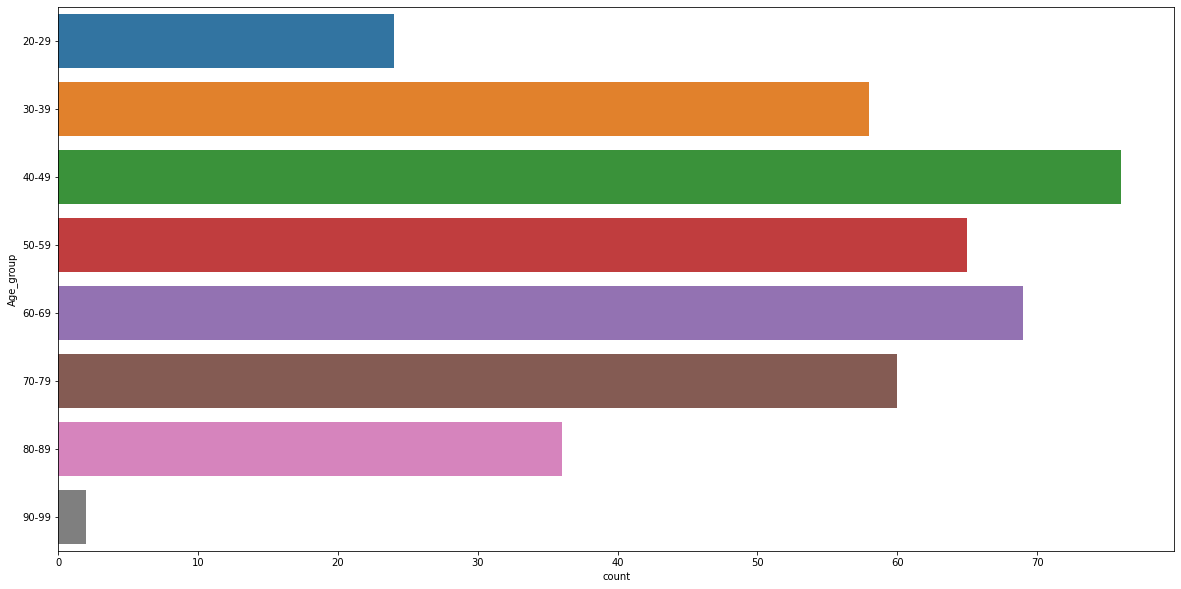

In [19]:
df_bin['Age_group'] = pd.cut(df_bin['Age'], [20, 29, 39,49, 59,69,79,89,99], 
                   labels=['20-29', '30-39', '40-49','50-59','60-69','70-79',
                           '80-89','90-99'])

fig = plt.figure(figsize=(20,10))
sns.countplot(y=df_bin['Age_group'], data=df_bin);


Great! Now the  categories above make more sense and can be used for analysis. The Bank seems to have clients mostly from the ages of 30 to 79. We can do a comparison with the other variables such as number of cards in each age group or even gender but you can do that for practise :)...

We will do the analysis of age groups with Balance and Income.

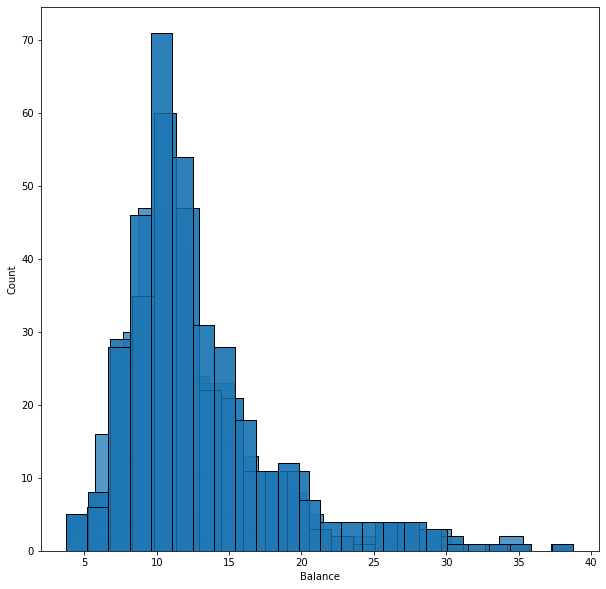

In [20]:
fig = plt.figure(figsize=(10, 10))
sns.histplot(df_bin.loc[df_bin['Age'] < 29 ]['Balance'], kde_kws={'label': 'Age < 29'});
sns.histplot(df_bin.loc[df_bin['Age'] < 39 ]['Balance'], kde_kws={'label': 'Age < 39'});
sns.histplot(df_bin.loc[df_bin['Age'] < 49 ]['Balance'], kde_kws={'label': 'Age < 49'});
sns.histplot(df_bin.loc[df_bin['Age'] < 59 ]['Balance'], kde_kws={'label': 'Age < 59'});
sns.histplot(df_bin.loc[df_bin['Age'] < 69 ]['Balance'], kde_kws={'label': 'Age < 69'});
sns.histplot(df_bin.loc[df_bin['Age'] < 79 ]['Balance'], kde_kws={'label': 'Age < 79'});
sns.histplot(df_bin.loc[df_bin['Age'] < 69 ]['Balance'], kde_kws={'label': 'Age < 89'});
sns.histplot(df_bin.loc[df_bin['Age'] < 79 ]['Balance'], kde_kws={'label': 'Age < 99'});




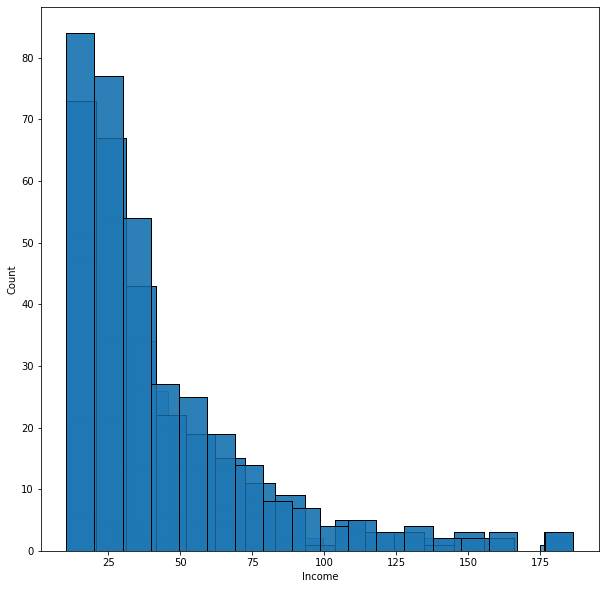

In [21]:
fig = plt.figure(figsize=(10, 10))
sns.histplot(df_bin.loc[df_bin['Age'] < 29 ]['Income'], kde_kws={'label': 'Age < 29'});
sns.histplot(df_bin.loc[df_bin['Age'] < 39 ]['Income'], kde_kws={'label': 'Age < 39'});
sns.histplot(df_bin.loc[df_bin['Age'] < 49 ]['Income'], kde_kws={'label': 'Age < 49'});
sns.histplot(df_bin.loc[df_bin['Age'] < 59 ]['Income'], kde_kws={'label': 'Age < 59'});
sns.histplot(df_bin.loc[df_bin['Age'] < 69 ]['Income'], kde_kws={'label': 'Age < 69'});
sns.histplot(df_bin.loc[df_bin['Age'] < 79 ]['Income'], kde_kws={'label': 'Age < 79'});
sns.histplot(df_bin.loc[df_bin['Age'] < 69 ]['Income'], kde_kws={'label': 'Age < 89'});
sns.histplot(df_bin.loc[df_bin['Age'] < 79 ]['Income'], kde_kws={'label': 'Age < 99'});




Clearly different age groups have different ranges of incomes and balances that can be further explored by Gender, Ethnicity and the cycle continues..

#### Ultimately, there’s no limit to the number of experiments one can perform in the EDA process – it completely depends on what you’re analysing, as well as the knowledge of packages such as Pandas and matplotlib our job becomes easier.



## Compulsory Task 

Use the Titanic dataset provided and Go wild with your analysis. Provide an indepth EDA on the data set be creative.

In [22]:
data=pd.read_csv("Titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
m=data["Sex"]=="male"
print("NUmber OF Males: ",data[m].size)


NUmber OF Males:  6924


In [25]:
f=data["Sex"]=="female"
print("Number of Females: ",data[f].size)


Number of Females:  3768


male      577
female    314
Name: Sex, dtype: int64


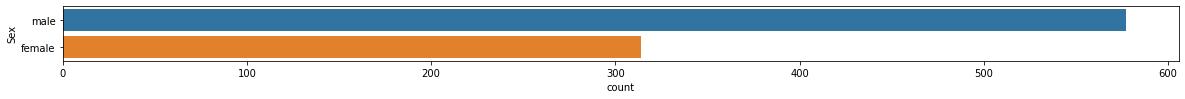

In [44]:
# How many passengers are Male and Female
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Sex', data=data);
print(data.Sex.value_counts())

By the help of graph we can see that there were half females as compare to man


Preview of data with null values:

   PassengerId  Survived  Pclass                      Name     Sex   Age  \
0            1         0       3   Braund, Mr. Owen Harris    male  22.0   
2            3         1       3    Heikkinen, Miss. Laina  female  26.0   
4            5         0       3  Allen, Mr. William Henry    male  35.0   

   SibSp  Parch            Ticket   Fare Cabin Embarked  
0      1      0         A/5 21171  7.250   NaN        S  
2      0      0  STON/O2. 3101282  7.925   NaN        S  
4      0      0            373450  8.050   NaN        S  


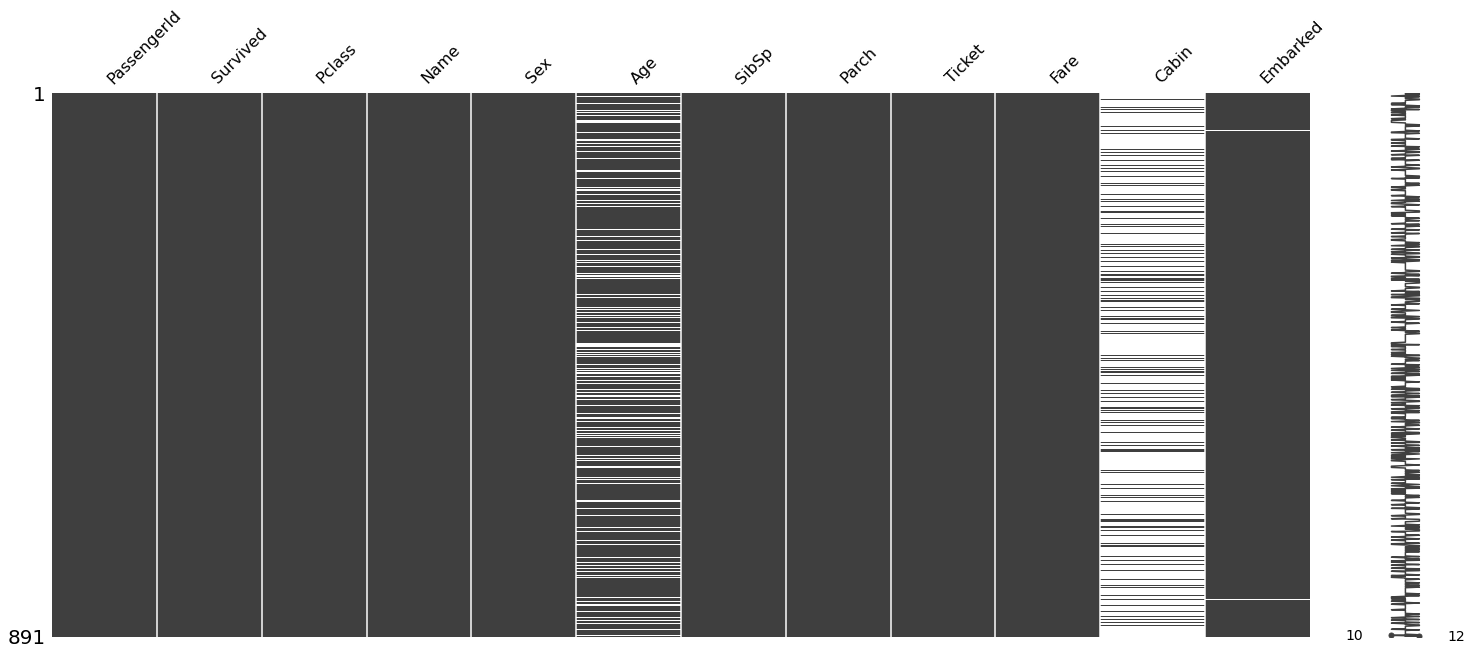

In [26]:
# generate preview of entries with null values
if data.isnull().any(axis=None):
    print("\nPreview of data with null values:\n")
    print(data[data.isnull().any(axis=1)].head(3))
    missingno.matrix(data)
    plt.show()

We can now be able to visualise where the data is missing and be able to strategise. We handled missing data in this data set in the previous task so if you need any refreshers refer to the previous task. 

In [27]:
# Deleting Duplicate values from dataset
data.drop_duplicates(inplace=True)

In [28]:
# Replacing 1 as yes and 0 as no,bcz it is easy to distinguish
data["Survived"] = data["Survived"].map({1:"yes" , 0 :"no"})
data["Survived"].value_counts()

no     549
yes    342
Name: Survived, dtype: int64

In [29]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,no,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,no,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


C:\Users\Arshad\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

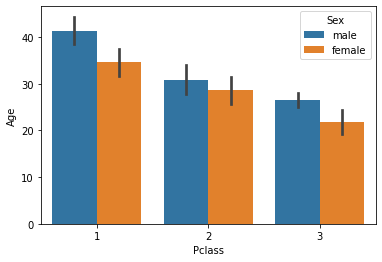

In [30]:
# Countplot counts the each category of value and plot that.
sns.barplot(data['Pclass'],data['Age'],hue=data['Sex'])

Here We can see how many males and female were on ship and their ages in different kind of classes. 

C:\Users\Arshad\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Arshad\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

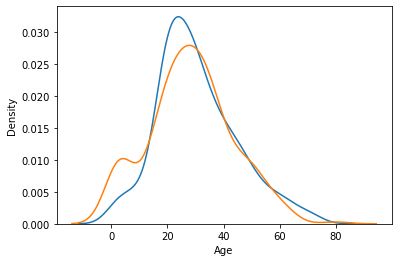

In [33]:

sns.distplot(data[data['Survived']=="no"]['Age'],hist=False)
sns.distplot(data[data['Survived']=="yes"]['Age'],hist=False)

here yellow line is for survive and we can see that most of the people survived, their age were between 20-40

<AxesSubplot:xlabel='Sex', ylabel='Age'>

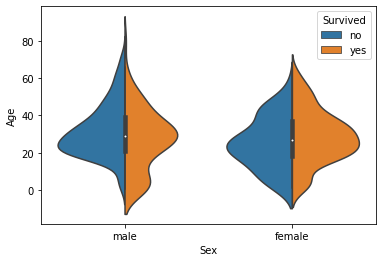

In [35]:

# Violinplot Displays distribution of data
# across all levels of a category.
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = data, split = True)

This graph gives a summary of the age range of men, women and children who were saved. The survival rate is –  

Good for children.
High for women in the age range 20-50.
Less for men as the age increases.

<AxesSubplot:>

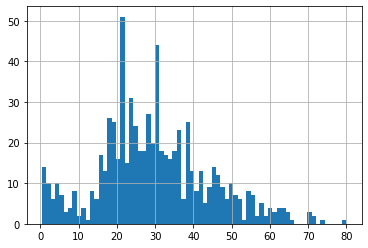

In [37]:
data["Age"].hist(bins=70)

Here we can see most of the passengers were in between 20–30 years old

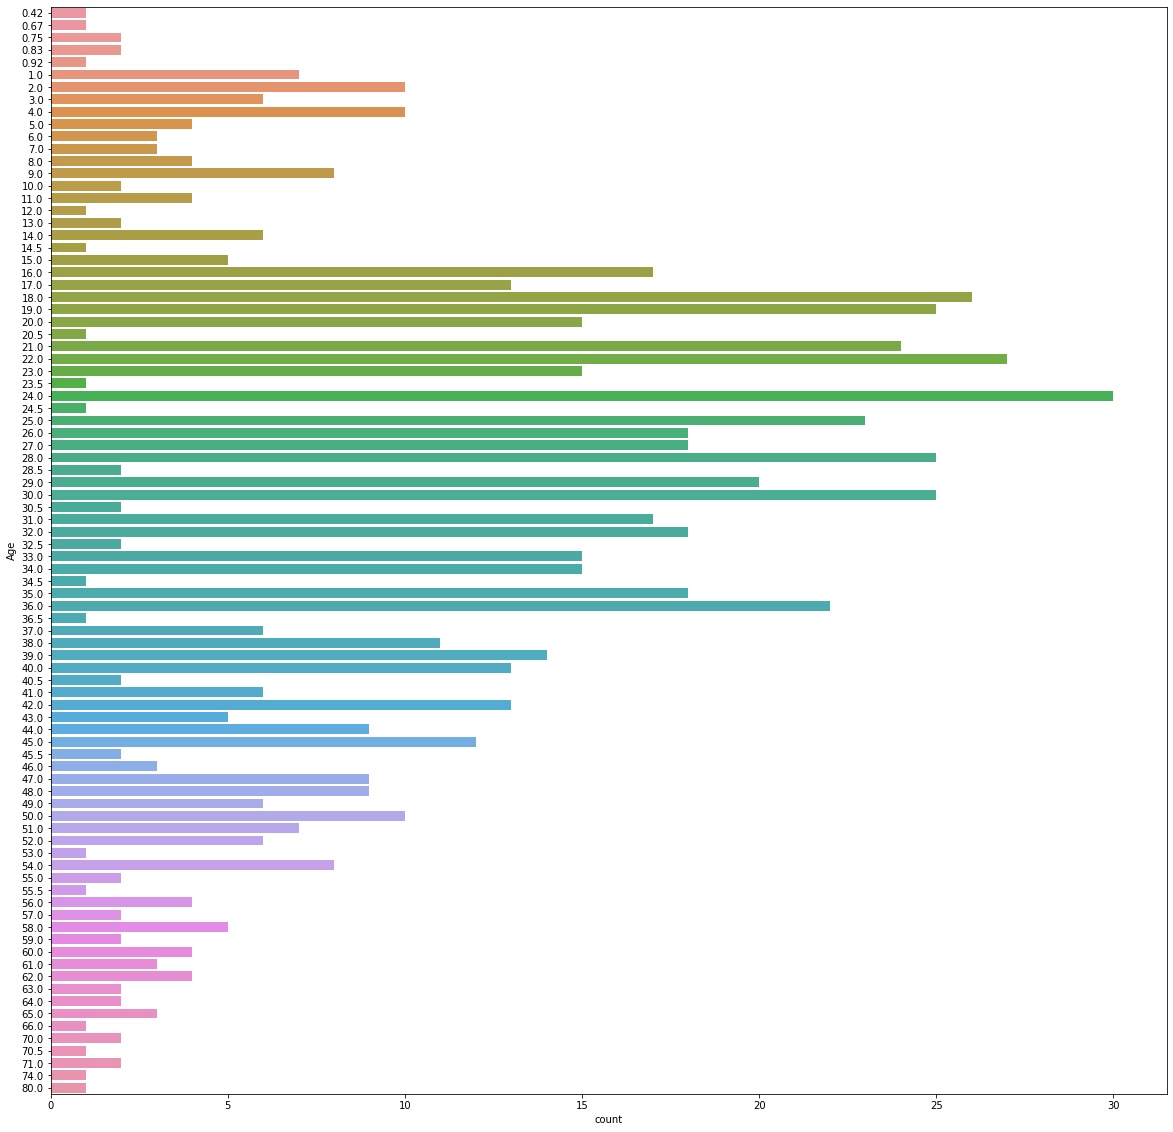

In [45]:

fig = plt.figure(figsize=(20,20))
sns.countplot(y=data['Age'], data=data);

This is detailed graph of age and their count